In [1]:
#Important Libraries


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [3]:
df = pd.read_csv('data.csv')

Exploratory Data Analysis (EDA)

In [4]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.000,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.000,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.000,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.000,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.000,?,?,?,0


As can be seen from the table above there is no null value; however some values in the dataset has a value like "?" so we should convert them to "Null"

In [5]:
df.shape

(294, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,294.000,47.827,7.812,28.000,42.000,49.000,54.000,66.000
sex,294.000,0.724,0.448,0.000,0.000,1.000,1.000,1.000
cp,294.000,2.983,0.965,1.000,2.000,3.000,4.000,4.000
oldpeak,294.000,0.586,0.909,0.000,0.000,0.000,1.000,5.000
num,294.000,0.361,0.481,0.000,0.000,0.000,1.000,1.000


<AxesSubplot:>

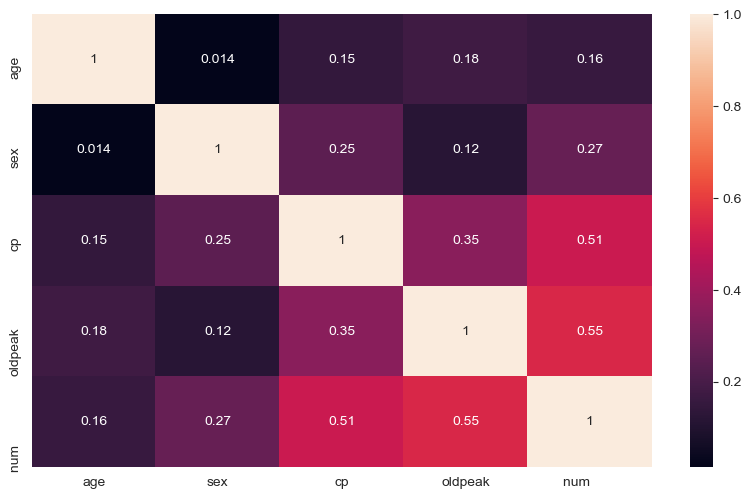

In [8]:
sns.heatmap(df.corr(),annot=True)

Based on the heatmap above, correlation on cp(chest pain) and num(our main target and also known as "attack") and between oldpeak(st depression) and num have been detected.

In [9]:
df.duplicated().value_counts()

False    293
True       1
dtype: int64

In [10]:
df.duplicated().sum()

1

Above it can be seen whether there are duplicated rows so one duplicated row has been detected, but this is not a big problem. We don't need to drop it.

The target variable's name has been changed in order to get the title of column clearly.

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

In [12]:
df.rename(columns={'num       ':'attack'}, inplace=True)

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'attack'],
      dtype='object')

Then question marks have been turned into Null.



In [14]:
df.replace('?', np.nan, inplace=True)

In [15]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,attack
0,28,1,2,130,132,0,2,185,0,0.000,NaN,NaN,NaN,0
1,29,1,2,120,243,0,0,160,0,0.000,NaN,NaN,NaN,0
2,29,1,2,140,NaN,0,0,170,0,0.000,NaN,NaN,NaN,0
3,30,0,1,170,237,0,1,170,0,0.000,NaN,NaN,6,0
4,31,0,2,100,219,0,1,150,0,0.000,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.500,NaN,NaN,NaN,1
290,54,0,3,130,294,0,1,100,1,0.000,2,NaN,NaN,1
291,56,1,4,155,342,1,0,150,1,3.000,2,NaN,NaN,1
292,58,0,2,180,393,0,0,110,1,1.000,2,NaN,7,1


In [16]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps     object
chol         object
fbs          object
restecg      object
thalach      object
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
attack        int64
dtype: object

Since data types of some columns were object, they were changed.



In [17]:
df = df.astype({'trestbps':'float64',
                'chol': 'float64',
                'fbs': 'float64',
                'restecg': 'float64',
                'thalach': 'float64',
                'exang': 'float64',
                'slope': 'float64',
                'thal' : 'float64'})

Float64 here has been utilized because the type of Null value is Float.



In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,attack
0,28,1,2,130.000,132.000,0.000,2.000,185.000,0.000,0.000,nan,NaN,nan,0
1,29,1,2,120.000,243.000,0.000,0.000,160.000,0.000,0.000,nan,NaN,nan,0
2,29,1,2,140.000,nan,0.000,0.000,170.000,0.000,0.000,nan,NaN,nan,0
3,30,0,1,170.000,237.000,0.000,1.000,170.000,0.000,0.000,nan,NaN,6.000,0
4,31,0,2,100.000,219.000,0.000,1.000,150.000,0.000,0.000,nan,NaN,nan,0


AGE

In [19]:
df.age.isnull().sum()

0

distribution of ages who've had a heart attack

In [20]:
attack_data = df[df.attack==1]

In [21]:
attack_data.head()

#I got the data of people who've had a heart attack only, to analyze them in detail. I will use this data for next visualizations.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,attack
188,31,1,4,120.000,270.000,0.000,0.000,153.000,1.000,1.500,2.000,NaN,nan,1
189,33,0,4,100.000,246.000,0.000,0.000,150.000,1.000,1.000,2.000,NaN,nan,1
190,34,1,1,140.000,156.000,0.000,0.000,180.000,0.000,0.000,nan,NaN,nan,1
191,35,1,2,110.000,257.000,0.000,0.000,140.000,0.000,0.000,nan,NaN,nan,1
192,36,1,2,120.000,267.000,0.000,0.000,160.000,0.000,3.000,2.000,NaN,nan,1


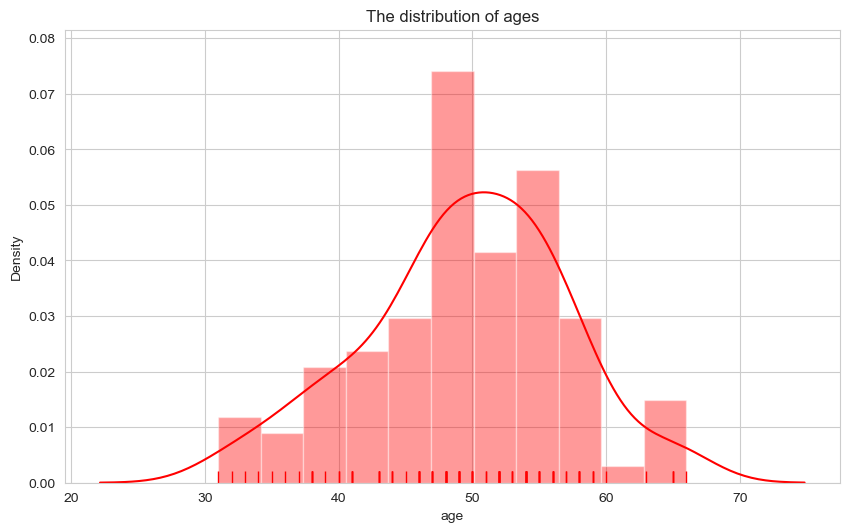

In [22]:
ax = sns.distplot(attack_data.age, rug=True, color= 'red')
plt.title("The distribution of ages")
plt.show()

The relation between age and heart attack: Whereas the blue one represents the people who have had a heart attack, the green one represents the people who haven't had a heart attack.

<AxesSubplot:title={'center':'Age & Heart attack relation'}, xlabel='age', ylabel='Density'>

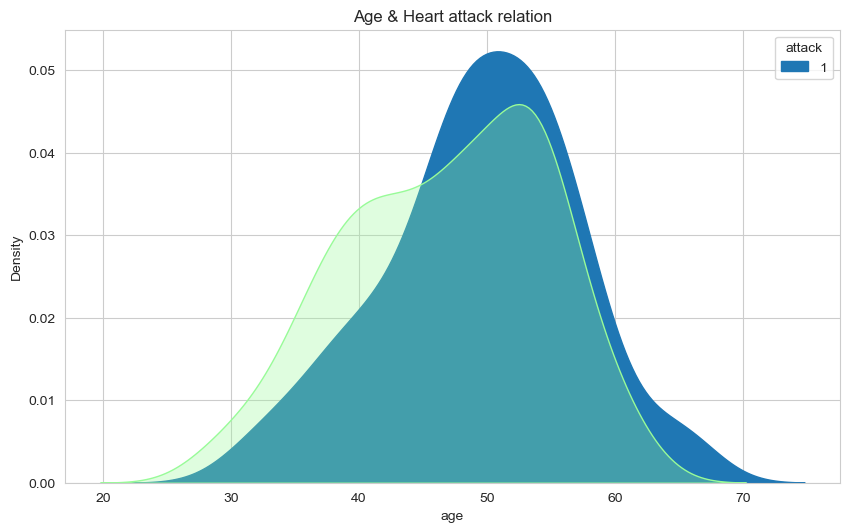

In [23]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
plt.title("Age & Heart attack relation")
sns.kdeplot(data = df[df.attack==1], x='age', hue='attack',ax=ax1,shade=True,alpha=1,color='coral')
sns.kdeplot(data=df[df.attack==0],x='age',ax=ax1,shade=True,color='palegreen',alpha=0.3)

In [24]:
df.age.isnull().sum()

0

Text(0.5, 1.0, 'The distribution of heart attack according to sex')

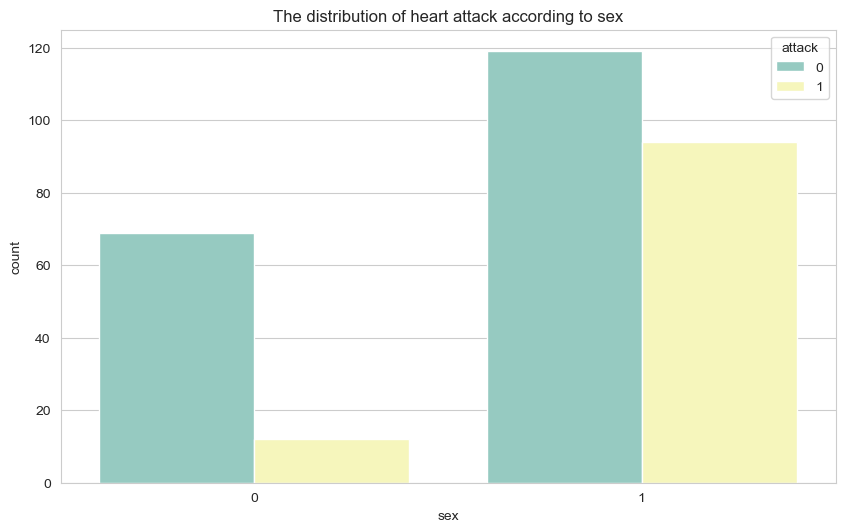

In [25]:
ax = sns.countplot(df.sex,hue=df.attack,palette="Set3")
plt.title("The distribution of heart attack according to sex")
#for p in ax.containers:
  #  ax.bar_label(containers)

The relation between sex and the probability of having a heart attack



In [26]:
df.groupby('sex').attack.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)


sex
1   44.131
0   14.815
Name: attack, dtype: float64

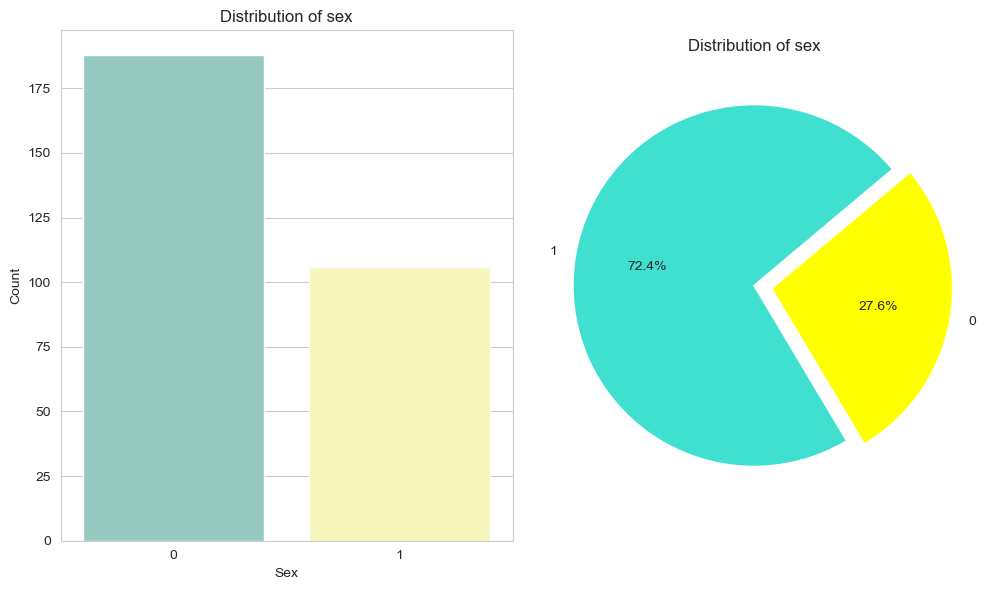

In [27]:
plt.subplot(1,2,1)
ax = sns.countplot(x='attack', data=df, palette="Set3")
plt.title('Distribution of sex')
plt.xlabel('Sex')
plt.ylabel('Count')
#ax.bar_label(ax.containers[0], fontsize=10, color='black', fontweight='bold')
plt.subplot(1,2,2)
plt.pie(df.sex.value_counts(), labels = df.sex.value_counts().index, autopct = '%1.1f%%', startangle = 40, explode = (0, 0.1), colors = ['turquoise', 'yellow'] )
plt.title('Distribution of sex')
plt.tight_layout()
plt.show()

CP chest pain


In [28]:
df.cp.isnull().sum()


0

Trestbps

In [29]:
df.trestbps.value_counts(dropna=False)


120.000    65
130.000    54
140.000    50
150.000    23
110.000    21
160.000    20
125.000     8
100.000     6
180.000     6
145.000     5
170.000     5
135.000     5
112.000     3
118.000     2
122.000     2
124.000     2
115.000     2
105.000     1
98.000      1
155.000     1
190.000     1
128.000     1
132.000     1
nan         1
108.000     1
113.000     1
92.000      1
106.000     1
200.000     1
138.000     1
136.000     1
142.000     1
Name: trestbps, dtype: int64

In [30]:
trestbps_mean = df["trestbps"].mean()
trestbps_mean

132.5836177474403

In [31]:
df.trestbps.fillna(trestbps_mean, inplace=True)


Cholestrol

In [32]:
df.chol.isnull().sum()


23

In [33]:
df.chol.value_counts(dropna=False).sort_values()


358.000     1
283.000     1
315.000     1
339.000     1
307.000     1
           ..
238.000     4
230.000     5
275.000     5
246.000     5
nan        23
Name: chol, Length: 154, dtype: int64

Again, mean has been used here.



In [34]:
chol_mean = df.chol.mean()
chol_mean

250.84870848708488

In [35]:
df.chol.fillna(chol_mean, inplace=True)

In [36]:
df.chol.isnull().sum()


0

fbs

In [37]:
df.fbs.isnull().sum()

8

In [38]:
df.fbs.value_counts(dropna=False)


0.000    266
1.000     20
nan        8
Name: fbs, dtype: int64

In [39]:
df.groupby('attack')['fbs'].value_counts(dropna = False)

attack  fbs  
0       0.000    175
        1.000      7
        NaN        6
1       0.000     91
        1.000     13
        NaN        2
Name: fbs, dtype: int64

Null values have been filled with the mode here.



In [40]:
df.fbs.fillna(0,inplace=True)

In [41]:
df.fbs.isnull().sum()

0

Restecg

In [42]:
df.restecg.isnull().sum()

1

In [43]:
df.restecg.value_counts(dropna= False)

0.000    235
1.000     52
2.000      6
nan        1
Name: restecg, dtype: int64

Mode has been used here again.



In [44]:
df.restecg.fillna(235,inplace=True)

In [45]:
df.restecg.isnull().sum()


0

thalach

In [46]:
df.thalach.isnull().sum()

1

In [47]:
df.thalach.value_counts(dropna=False)


150.000    29
140.000    21
130.000    17
170.000    14
160.000    13
120.000    11
110.000     9
142.000     8
125.000     8
135.000     7
100.000     7
155.000     7
138.000     6
115.000     6
175.000     6
180.000     6
145.000     6
118.000     5
122.000     5
124.000     4
116.000     4
134.000     4
137.000     4
98.000      4
165.000     4
132.000     3
184.000     3
172.000     3
152.000     3
168.000     3
144.000     3
185.000     3
96.000      3
148.000     3
92.000      3
112.000     3
174.000     2
136.000     2
99.000      2
158.000     2
146.000     2
126.000     2
128.000     2
94.000      2
154.000     2
164.000     2
162.000     1
102.000     1
143.000     1
105.000     1
82.000      1
nan         1
108.000     1
91.000      1
190.000     1
121.000     1
119.000     1
178.000     1
87.000      1
114.000     1
156.000     1
129.000     1
139.000     1
103.000     1
90.000      1
106.000     1
153.000     1
176.000     1
127.000     1
167.000     1
188.000     1
166.00

In [48]:
thalach_median = df.thalach.median()
thalach_median

140.0

Median has been used here.



In [49]:
df.thalach.fillna(thalach_median, inplace=True)


In [50]:
df.thalach.isna().sum()

0

exang

In [51]:
df.exang.isnull().sum()


1

In [52]:
df.exang.value_counts(dropna=False)


0.000    204
1.000     89
nan        1
Name: exang, dtype: int64

In [53]:
df.groupby("attack")["exang"].value_counts(dropna=False)
# to show whether there is a relation between "exang" feature and heart attack.

attack  exang
0       0.000    168
        1.000     19
        NaN        1
1       1.000     70
        0.000     36
Name: exang, dtype: int64

Mode has been used.



In [54]:
df.exang.fillna(0, inplace = True)

oldpeak

In [55]:
df.oldpeak.isnull().sum()

0

slope

In [56]:
df.slope.isnull().sum()

190

Since there are a lot of null values, this column will be dropped.



ca

In [57]:
df.ca.isnull().sum()

291

Also this column will be dropped.



thal

In [58]:
df.thal.isnull().sum()

266

Also this column will be dropped.


In [59]:
df.drop(columns= ["slope","ca","thal"], inplace=True)

Attack (target)


In [60]:
df.attack.isnull().sum()

0

In [61]:
df['attack'].value_counts()

0    188
1    106
Name: attack, dtype: int64

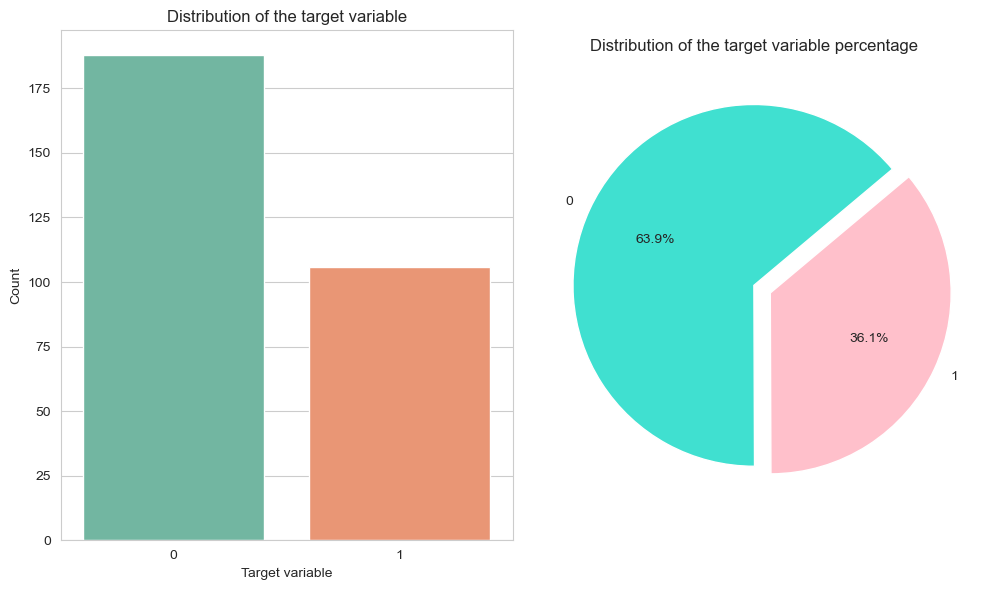

In [62]:
plt.subplot(1,2,1)
ax = sns.countplot(x='attack', data=df, palette="Set2")
plt.title('Distribution of the target variable')
plt.xlabel('Target variable')
plt.ylabel('Count')
#ax.bar_label(ax.containers[0], fontsize=10, color='black', fontweight='bold')
plt.subplot(1,2,2)
plt.pie(df.attack.value_counts(), labels = df.attack.value_counts().index, autopct = '%1.1f%%', startangle = 40, explode = (0, 0.1), colors = ['turquoise', 'pink'] )
plt.title('Distribution of the target variable percentage')
plt.tight_layout()
plt.show()

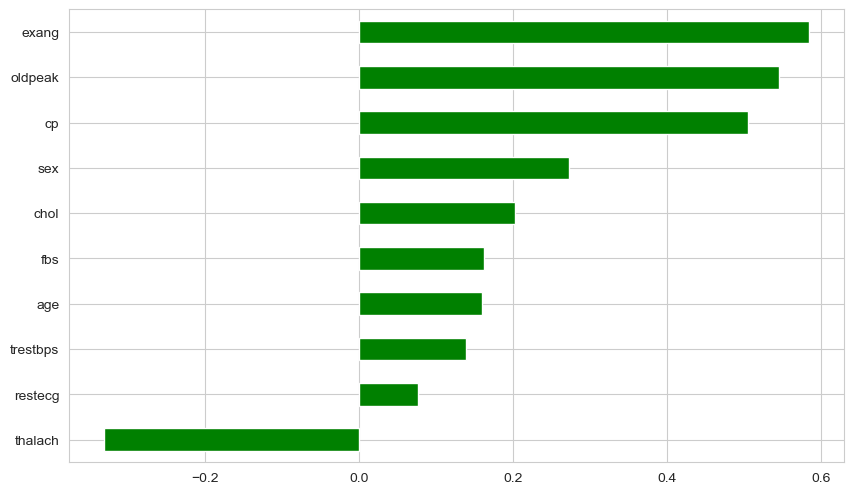

In [63]:
df.corr()['attack'].sort_values().drop('attack').plot(kind = 'barh', color="green");
# Correlation of the target column with other columns

In [64]:
df.isnull().sum()
# At the end of the EDA stage, it has been checked if there were any null values left.


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
attack      0
dtype: int64

In [65]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,attack
0,28,1,2,130.000,132.000,0.000,2.000,185.000,0.000,0.000,0
1,29,1,2,120.000,243.000,0.000,0.000,160.000,0.000,0.000,0
2,29,1,2,140.000,250.849,0.000,0.000,170.000,0.000,0.000,0
3,30,0,1,170.000,237.000,0.000,1.000,170.000,0.000,0.000,0
4,31,0,2,100.000,219.000,0.000,1.000,150.000,0.000,0.000,0


The last version of the dataset was displayed and gotten its copy.

    

In [66]:
df2 = df.copy()

# Modelling

In [67]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print("confussion matrix")
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print()
    print("Train_Set")
    print("confussion matrix")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [68]:
from collections import Counter


In [69]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, auc, roc_curve, average_precision_score, precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from yellowbrick.classifier import PrecisionRecallCurve

Logistic Regression

Preprocessing

Since the data have ordinal values, "get dummies" has been applied.



In [70]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,attack
0,28,1,2,130.000,132.000,0.000,2.000,185.000,0.000,0.000,0
1,29,1,2,120.000,243.000,0.000,0.000,160.000,0.000,0.000,0
2,29,1,2,140.000,250.849,0.000,0.000,170.000,0.000,0.000,0
3,30,0,1,170.000,237.000,0.000,1.000,170.000,0.000,0.000,0
4,31,0,2,100.000,219.000,0.000,1.000,150.000,0.000,0.000,0


In [71]:
log_df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang'])

Then, the other columns have been scaled. Scaling in logistic regression is used mainly because given datasets are generally composed of some features which are varied mostly in many perspective. However, ML algorithms usually utilize from same logic of computations which might create confusion. To minimize the problem, we need to bring all features to the same level of magnitudes, and that's why we use scaling.

In [72]:
scaler = StandardScaler()
columns= ['age','trestbps','chol','thalach','oldpeak']
log_df[columns] = scaler.fit_transform(log_df[columns])

In [73]:
log_df.head()

,age,trestbps,chol,thalach,oldpeak,attack,sex_0,sex_1,cp_1,cp_2,cp_3,cp_4,fbs_0.0,fbs_1.0,restecg_0.0,restecg_1.0,restecg_2.0,restecg_235.0,exang_0.0,exang_1.0
0,-2.542,-0.147,-1.833,1.951,-0.646,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0
1,-2.414,-0.716,-0.121,0.888,-0.646,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0
2,-2.414,0.422,0.000,1.313,-0.646,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0
3,-2.286,2.130,-0.214,1.313,-0.646,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
4,-2.158,-1.855,-0.491,0.462,-0.646,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


Above is the final version of the data we'll be using throughout the Logistic Regression modeling.



In [74]:
X = log_df.drop(['attack'], axis =1)
y = log_df['attack']

In [75]:
print(Counter(y))

Counter({0: 188, 1: 106})


At first, "stratify=y" parameter was not used but after using it, the scores have increased as the proportions of values reflected in this parameter and of sample turns into the same by splitting.

In [76]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [77]:
print(Counter(y_train))
print(Counter( y_test))

Counter({0: 127, 1: 78})
Counter({0: 61, 1: 28})


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)


In [79]:
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 150, 1: 85})
Counter({0: 38, 1: 21})


In [80]:
from sklearn.linear_model import LogisticRegression


In [81]:
log_model = LogisticRegression()

In [82]:
log_model.fit(X_train, y_train)

LogisticRegression()

Following the result of first scores, it's time to tune the parameters and use grid search.



In [83]:
eval_metric(log_model, X_train,y_train, X_test, y_test)


Test_Set
confussion matrix
[[33  5]
 [ 5 16]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        38
           1       0.76      0.76      0.76        21

    accuracy                           0.83        59
   macro avg       0.82      0.82      0.82        59
weighted avg       0.83      0.83      0.83        59


Train_Set
confussion matrix
[[135  15]
 [ 25  60]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       150
           1       0.80      0.71      0.75        85

    accuracy                           0.83       235
   macro avg       0.82      0.80      0.81       235
weighted avg       0.83      0.83      0.83       235



In [84]:
log_model = LogisticRegression( C=0.2, max_iter = 200, class_weight="balanced")  
log_model.fit(X_train, y_train)
eval_metric(log_model, X_train, y_train, X_test, y_test)

Test_Set
confussion matrix
[[31  7]
 [ 3 18]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        38
           1       0.72      0.86      0.78        21

    accuracy                           0.83        59
   macro avg       0.82      0.84      0.82        59
weighted avg       0.84      0.83      0.83        59


Train_Set
confussion matrix
[[130  20]
 [ 21  64]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       150
           1       0.76      0.75      0.76        85

    accuracy                           0.83       235
   macro avg       0.81      0.81      0.81       235
weighted avg       0.83      0.83      0.83       235



This model has been tuned several times, and these parameters are the best in terms of scores for the Logistic Regression model.

In [85]:
y_pred = log_model.predict(X_test)
log_f1 = f1_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)

In [86]:
print(log_f1, log_recall, log_f1)

0.782608695652174 0.8571428571428571 0.782608695652174


# Grid Search for Logistic Regression (Hyperparameter Tuning) 

In [87]:
GridSearchCV

sklearn.model_selection._search.GridSearchCV